## 1. Load and explore the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# function to sense check the uploaded or created dataframes
def sense_check(dataframe):
    print(dataframe.shape)
    print(dataframe.size)
    print(dataframe.isna().sum())

In [4]:
# Explore the data
sense_check(reviews)


(2000, 11)
22000
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [5]:
# Basic descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Dataframe refinement

In [6]:
# Drop unnecessary columns.
reviews_clean = reviews.drop(columns=['language', 'platform'])

#renaming columns
reviews_clean.rename(columns={'remuneration (k£)':'renumeration',
                              'spending_score (1-100)':'spending_score'
                              }, inplace=True)
# View column names.
reviews_clean.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [7]:
# View the new dataframe
reviews_clean.head()


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [8]:
sense_check(reviews_clean)

(2000, 9)
18000
gender            0
age               0
renumeration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64


## 3. Save the dataFrame as .CSV file

In [9]:
# Create a CSV file as output.
reviews_clean.to_csv('reviews_clean.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
reviews_imported = pd.read_csv('reviews_clean.csv')

# View DataFrame.
reviews_imported.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5.Linear Regression

### 5a. spending vs. loyalty

In [11]:
# Define independent variable.
X = reviews_imported['spending_score']

# Define dependent variable.
Y = reviews_imported['loyalty_points']

# Create model and print summary of metrics.
model = sm.OLS(Y, X)
f = 'Y~X'
spending_result = ols(f, data= reviews_imported).fit()
spending_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 04 Oct 2025   Prob (F-statistic):          2.92e-263
Time:                        02:32:03   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Extract the estimated parameters.
print(f"Parameters of OLS: {spending_result.params}")

# Extract the standard errors.
print(f"Standard errors: {spending_result.bse}")

# Extract the predicted values.
print(f"Predicted values of OLS: {spending_result.predict()}")

Parameters of OLS: Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors: Intercept    45.930554
X             0.814419
dtype: float64
Predicted values of OLS: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [13]:
# Set the X coefficient and the constant to generate the regression table.
Y_pred = (spending_result.params['Intercept'] + spending_result.params['X'] * reviews_imported['spending_score'])

# View the output.
Y_pred

0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Name: spending_score, Length: 2000, dtype: float64

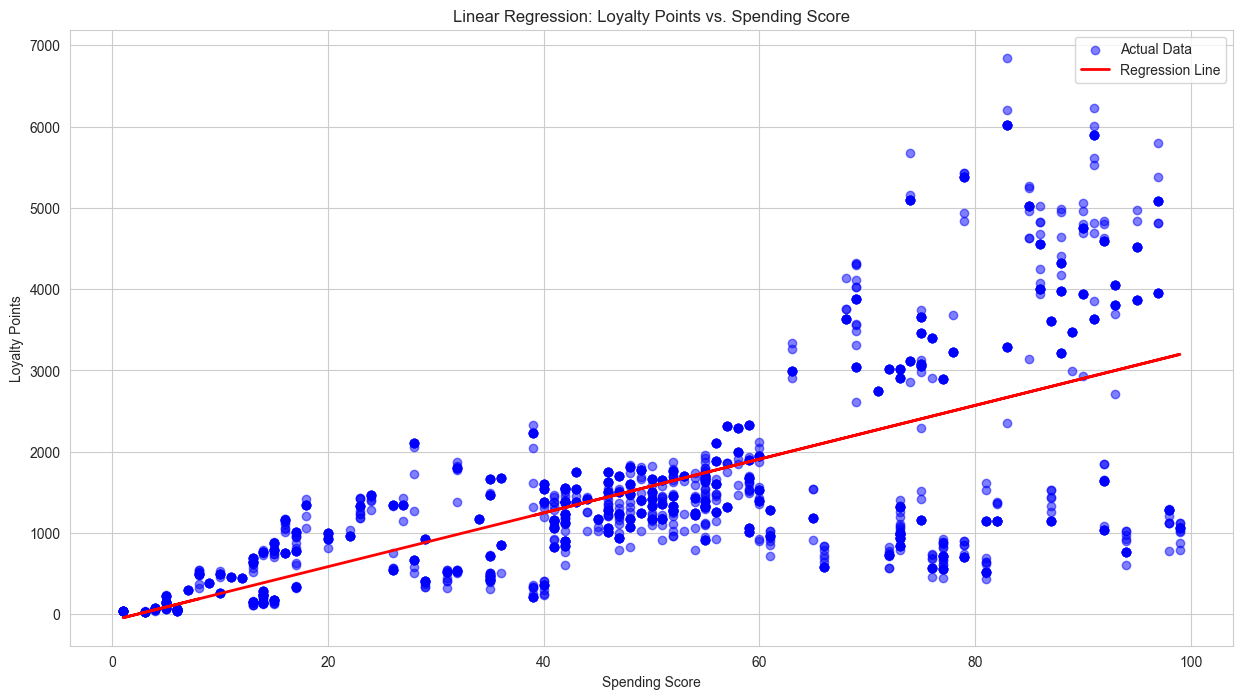

In [14]:
# Plot the graph with a regression line.
plt.figure(figsize=(15, 8))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Loyalty Points vs. Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.legend()
plt.grid(True)
plt.show()


### 5b. renumeration vs. loyalty

In [15]:
# Define independent variable.
X_renum = reviews_imported['renumeration'].values.reshape(-1,1)

# Define dependent variable.
Y_loyal = reviews_imported['loyalty_points'].values.reshape(-1,1)

# Create model and print summary of metrics.
lm = LinearRegression()

# fit the model
lm.fit(X_renum, Y_loyal)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# split the data.
X_renum_train, X_renum_test, Y_loyal_train, Y_loyal_test = train_test_split(X_renum, Y_loyal, test_size=0.2, random_state=100)

# fitting the model with the train data
lm.fit(X_renum_train, Y_loyal_train)


# predict the training data
YLoyalPred = lm.predict(X_renum_train)
YLoyalPred

array([[1218.37282635],
       [1740.05388846],
       [1932.2521745 ],
       ...,
       [ 751.60556025],
       [3057.98499273],
       [2344.10564458]], shape=(1600, 1))

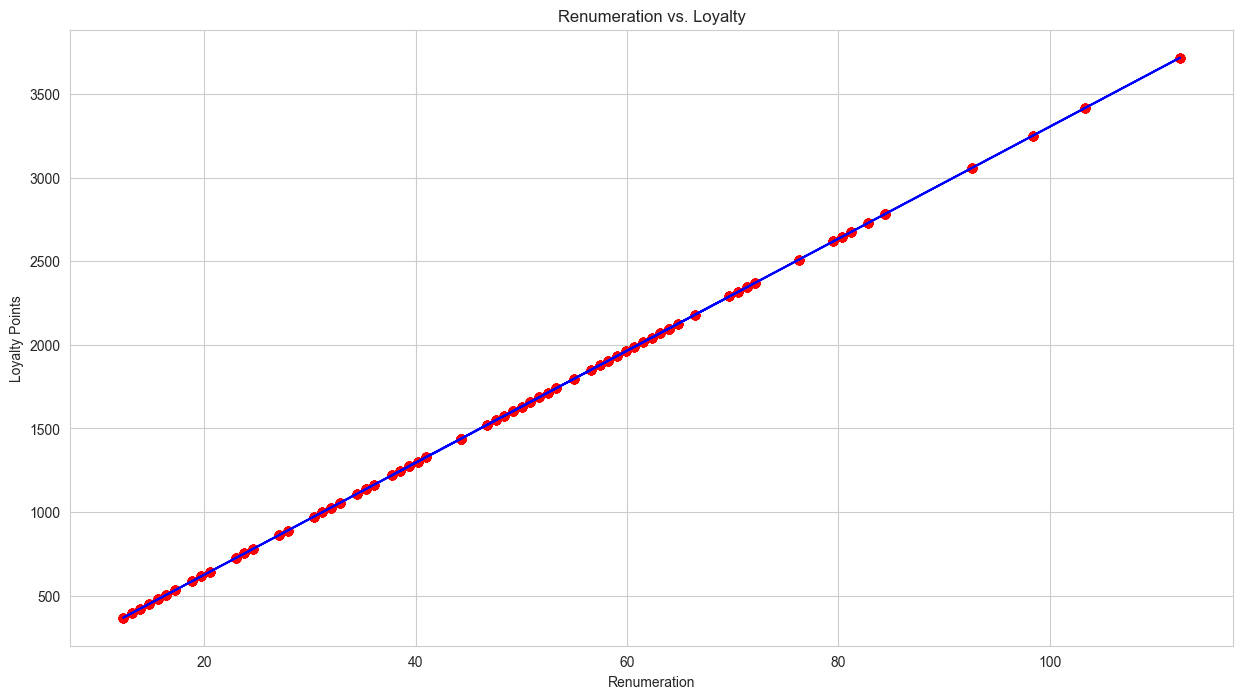

In [17]:
# visualizing the model
plt.figure(figsize=(15, 8))
plt.scatter(X_renum_train, YLoyalPred, color='red')
plt.plot(X_renum_train, YLoyalPred, color='blue')
plt.title("Renumeration vs. Loyalty")
plt.xlabel('Renumeration')
plt.ylabel('Loyalty Points')
plt.show()


In [18]:
# Evaluate the goodness of the model
print("R-Squared Value: ", lm.score(X_renum_train, Y_loyal_train) )
print("Intercept value: ", lm.intercept_)
print("Coefficient of determination: ", lm.coef_)


R-Squared Value:  0.3627507867812333
Intercept value:  [-44.64448192]
Coefficient of determination:  [[33.48402196]]


In [19]:
# predicting test set values
YLoyalPred_test = lm.predict(X_renum_test)

Text(0, 0.5, 'Loyalty Points')

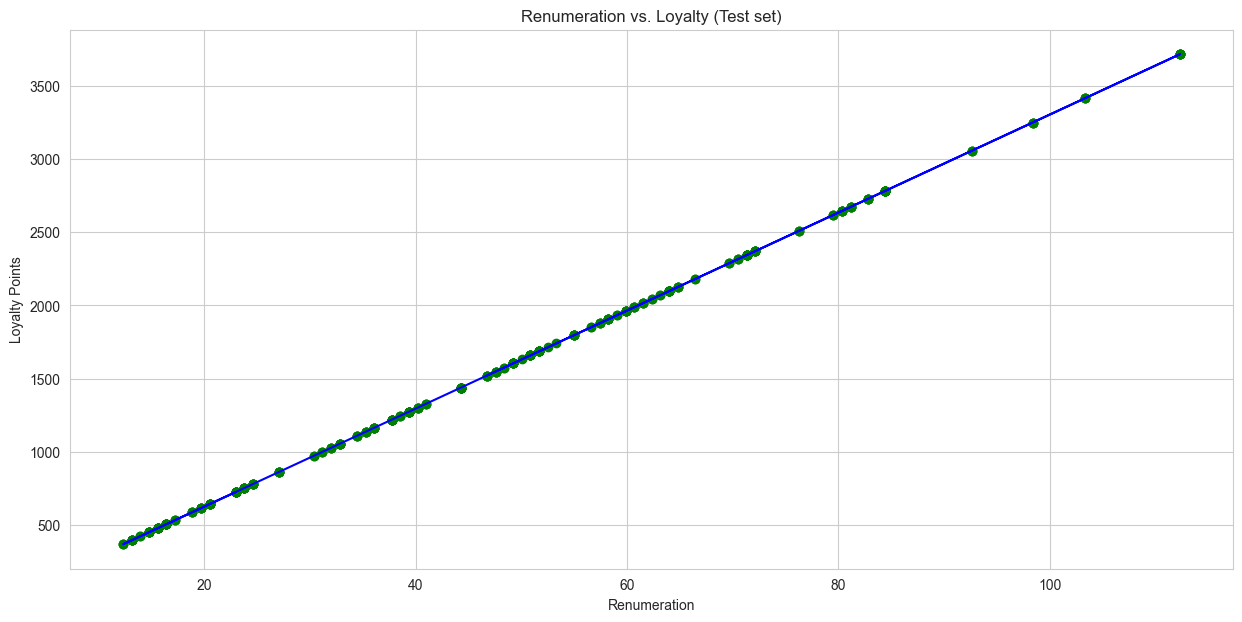

In [20]:
# visualising the test set
plt.figure(figsize=(15, 7))
plt.scatter(X_renum_test, YLoyalPred_test, color='green')
plt.plot(X_renum_test, YLoyalPred_test, color='blue')
plt.title("Renumeration vs. Loyalty (Test set)")
plt.xlabel('Renumeration')
plt.ylabel('Loyalty Points')

In [21]:
# determing the accuracy of the test data
print("R-Squared Value: ", lm.score(X_renum_test, Y_loyal_test) )

R-Squared Value:  0.43926219561021806


### 5c. age vs. loyalty

In [22]:
# Define independent variable.
x = reviews_imported['age']

# Define dependent variable.
y = reviews_imported['loyalty_points']

# Create model and print summary of metrics
model = sm.OLS(y, x)
f = 'y ~ x'
age_result = ols(f, data = reviews_clean).fit()
age_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 04 Oct 2025   Prob (F-statistic):             0.0577
Time:                        02:32:04   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Extract the estimated parameters.
print(f"Parameters of OLS: {age_result.params}")

# Extract the standard errors.
print(f"Standard errors: {age_result.bse}")

# Extract the predicted values.
print(f"Predicted values of OLS: {age_result.predict()}")


Parameters of OLS: Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors: Intercept    88.248731
x             2.113177
dtype: float64
Predicted values of OLS: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [24]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (age_result.params['Intercept'] + age_result.params['x'] * reviews_imported['age'])

# View the output.
y_pred


0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Name: age, Length: 2000, dtype: float64

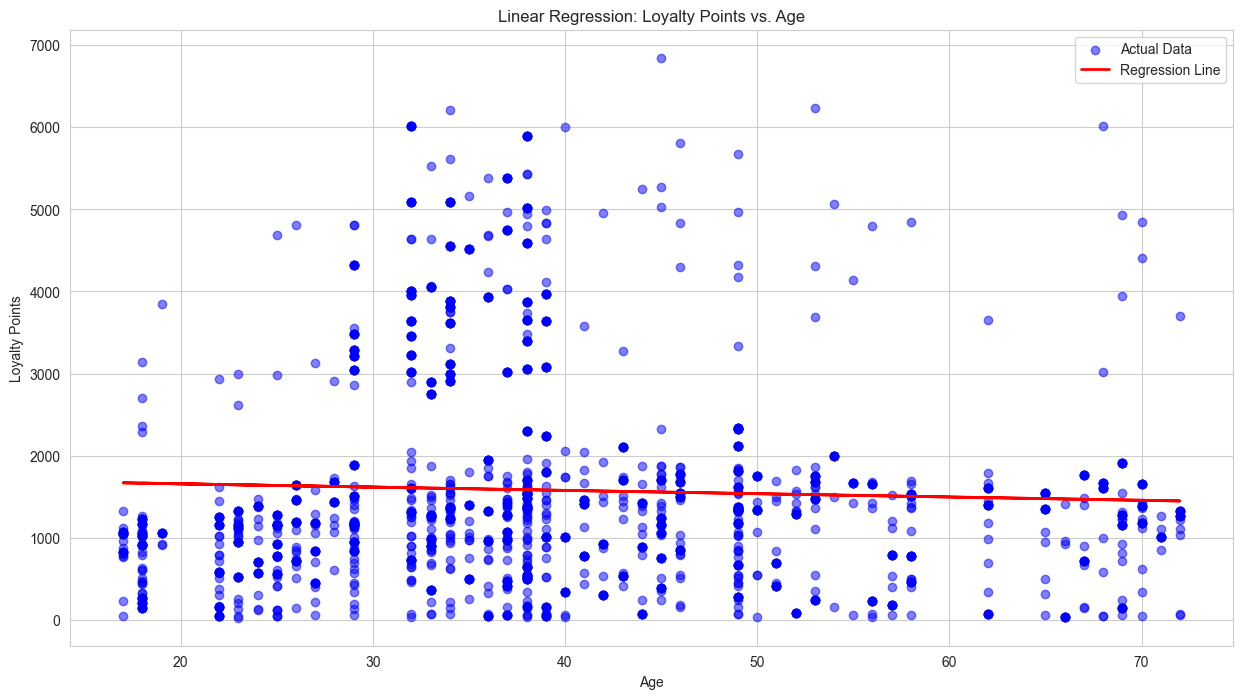

In [25]:
# Plot graph with regression line.
plt.figure(figsize=(15, 8))
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Loyalty Points vs. Age')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.legend()
plt.grid(True)
plt.show()

## 6. Observations & Insights

#### Renumeration
R-Squared Value:  0.3627507867812333
Intercept value:  [-44.64448192]
Coefficient of determination:  [[33.48402196]]
based on the received values we can draw the following conclusion
- each 1000 pounds of renumeration adds circa 33 loaylty points
- R-Squared at 0.36 shows that though the number of loyalty points is dependent on the renumeration, there are other factors that influence this metric. So, the renumeration should be considered and used along with other independent variables.